# Introduction

**Name : Luthfi Fadhlillah**
<br>
**Batch : FTDS 009**

The method used in this task is to use the gradient concept to detect edges in the image and multiply it by a matrix.

# Import Library

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Data Loading
Opens the data to be used which is an image.

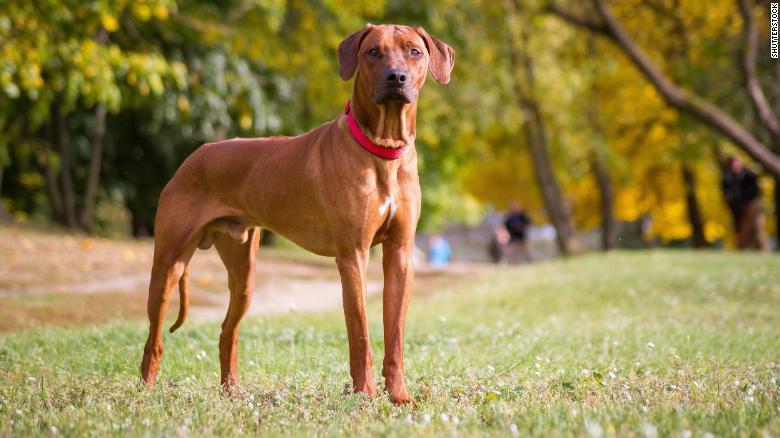

In [2]:
image = Image.open('Image_GC2.jpg')
image

Find image formats, image sizes, and modes in images by using the PIL library.

In [3]:
print(image.format, image.size, image.mode)

JPEG (780, 438) RGB


Reading datasets or images using matplotlib to make it easier to find the edges.

In [4]:
img = plt.imread(('Image_GC2.jpg'))

# Data Cleaning
At the beginning of the image processing, data cleaning is carried out by searching for each color, namely Red, Green, and Blue, and looking for the greyscale by multiplying each variable with certain predetermined constants and totaling them.

Text(0.5, 1.0, 'Blue Image')

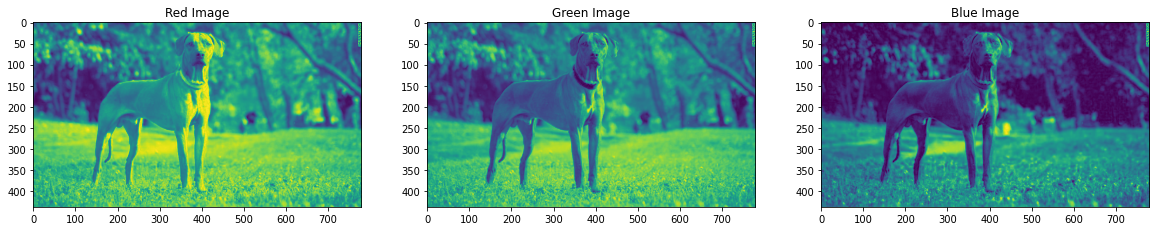

In [5]:
#Konversi ke grayscale
Rimg = img[:,:,0]
Gimg = img[:,:,1]
Bimg = img[:,:,2]
greyscale = (0.2989  * Rimg) + (0.5870 * Gimg) + (0.1140 * Bimg) # rumus greyscale

fig, ax = plt.subplots(ncols = 3, figsize=(20,5))
ax[0].imshow(Rimg)
ax[0].set_title('Red Image')
ax[1].imshow(Gimg)
ax[1].set_title('Green Image')
ax[2].imshow(Bimg)
ax[2].set_title('Blue Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'dz')

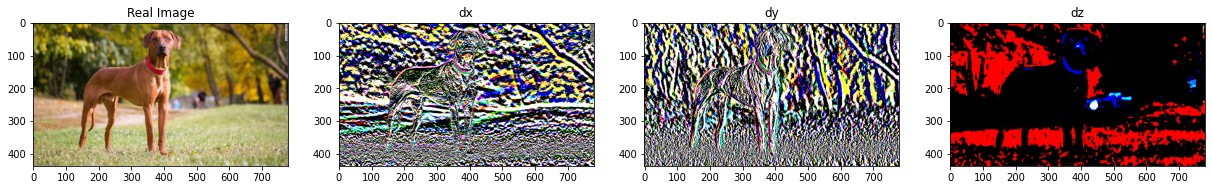

In [6]:
fig, ax = plt.subplots(ncols=4,figsize=(21,5))

dx, dy, dz = np.gradient(image)

ax[0].imshow(image)
ax[0].set_title('Real Image')
ax[1].imshow(dx)
ax[1].set_title('dx')
ax[2].imshow(dy)
ax[2].set_title('dy')
ax[3].imshow(dz)
ax[3].set_title('dz')

PIL also has a function to change the color of the image to greyscale.

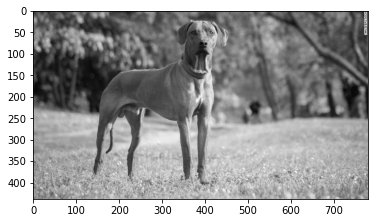

In [7]:
grey = image.convert('L')
plt.imshow(grey, cmap = 'gray')

In [8]:
grey.size

(780, 438)

# Image Processing & Result
To detect edges in an image, it begins by looking for a gradient or partial derivative of an image that has been converted to greyscale. The goal is to change it to greyscale so that the array turns into 2 dimensions.

In [9]:
dx, dy = np.gradient(grey)
print(dx)
print(dy)

[[ -9.   -9.   -8.  ...  -2.   18.  -22. ]
 [-10.5 -10.   -9.  ...   4.   -1.    4.5]
 [ -9.   -9.   -8.  ... 107.5 -14.   20. ]
 ...
 [ -0.5  -2.   -2.5 ...   2.    1.5   1. ]
 [ -0.5  -1.   -1.5 ...   5.    4.    2.5]
 [  0.    0.   -1.  ...   5.    4.    2. ]]
[[  0.   -1.   -2.5 ...  -1.5   5.5  13. ]
 [  0.   -0.5  -1.  ...   6.   -4.5 -27. ]
 [  1.    0.5   0.5 ...  -3.    6.   24. ]
 ...
 [ -6.   -8.   -9.5 ...   1.   -2.5  -4. ]
 [ -7.   -8.5  -8.5 ...   0.5  -3.5  -5. ]
 [ -7.   -9.   -9.  ...  -0.5  -5.   -7. ]]


After that, look for the gradient magnitude by rooting the total of each variable that has been squared

In [10]:
gradient_magnitude = np.sqrt(dx**2 + dy**2)
gradient_magnitude

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

Threshold is used as a determining parameter which includes edges, the threshold used is 20,30,40 and 50. If the gradient magnitude value exceeds the threshold number, then the edge is detected.

[[False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ...  True False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


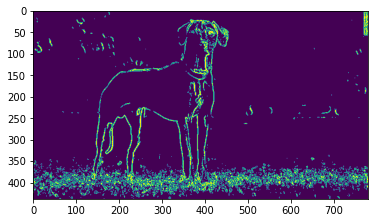

In [11]:
threshold_1 = gradient_magnitude > 20
print(threshold_1)
plt.imshow(threshold_1)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


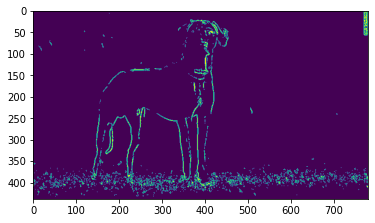

In [12]:
threshold_2 = gradient_magnitude > 30
print(threshold_2)
plt.imshow(threshold_2)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


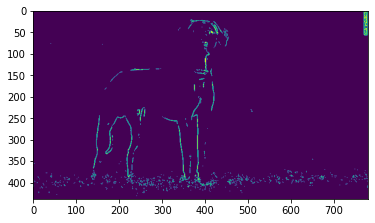

In [13]:
threshold_3 = gradient_magnitude > 40
print(threshold_3)
plt.imshow(threshold_3)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


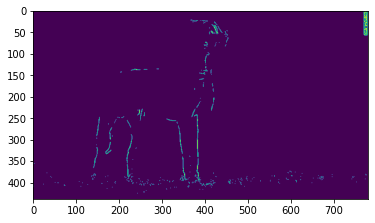

In [14]:
threshold_4 = gradient_magnitude > 50
print(threshold_4)
plt.imshow(threshold_4)

The best threshold based on the experimental results above is the threshold value = 30. Why? because at the threshold value of 30, the dog's body looks very easy to recognize, there isn't much noise from the resulting image. Then what about the threshold of 20? Threshold 20 dog images are very clear but there is a lot of noise from the surrounding environment that is detected.

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


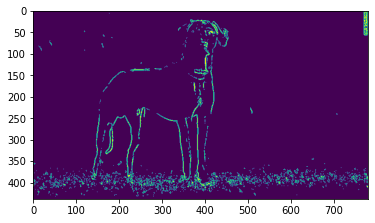

In [15]:
print(threshold_2)
plt.imshow(threshold_2)

After getting the edge, multiply it by the matrix. The matrix is generated from a random matrix which is generated according to the needs of the matrix. In this case, if you use the Hadamard product, the size matrix generated must be the same as the image (438,700).

In [16]:
random_matrix = np.random.rand(438, 780)
multiplication = random_matrix*gradient_magnitude
print(multiplication)

[[ 5.70214482  3.34392328  8.12852277 ...  0.93208718  6.97227672
   2.61432472]
 [ 2.43034303  3.23261411  3.02349572 ...  4.9212488   1.01842724
  22.57057343]
 [ 6.35071962  0.75054793  4.12932161 ... 44.16401232 10.2707693
   6.01021357]
 ...
 [ 5.2352726   3.89199544  1.73573429 ...  0.78311496  0.25078706
   1.47570544]
 [ 4.01340117  0.64562211  1.5249263  ...  1.21584495  1.02246319
   0.05951516]
 [ 5.74069716  7.48786849  0.96414329 ...  1.26490775  6.34871034
   6.04790889]]


If using a dot product or multiplying a matrix with a matrix, then the generated matrix column must be the same as the row in the image matrix. Therefore, the random matrix generated is (780,438).

In [17]:
random_matrix = np.random.rand(780, 438)
dot = np.dot(random_matrix,gradient_magnitude)
print(dot)

[[1678.71478393 1600.3232204  1624.27238109 ... 3700.08024209
  3550.56077893 1890.11612706]
 [1774.52452907 1673.56547369 1648.66829422 ... 3683.0652417
  3653.96524351 1957.19003763]
 [1716.8606149  1598.17487811 1638.92574103 ... 3520.23888721
  3731.97837883 1884.66772969]
 ...
 [1583.96150412 1510.94460194 1525.71626796 ... 3533.58994496
  3442.03138681 1727.1843718 ]
 [1678.30147283 1574.93570246 1577.89814682 ... 3387.98881479
  3590.5324559  1787.46142117]
 [1638.9375252  1577.18267674 1582.99730419 ... 3731.74140125
  3847.1353397  1894.14928196]]


# Conclusion

It can be concluded that of the 4 thresholds displayed, the threshold with a value of 30 is the best compared to the threshold values of 20, 40 and 50. Because in each of these thresholds there is still some disturbing noise and the edges do not show images for easy understanding. 

Also from the analysis results it can be said that using the PIL, numpy, and matplotlib libraries can detect edges in an image using the partial derivative method and look for the gradient magnitude of the image.